In [2]:
import numpy as np
import matplotlib.pyplot as plt
from levy_beyond_mean_field import *

This notebook shows how the use `levy_beyond_mean_field.py` to construct PDFs of the density.

Mainly, the starting point/input is an array of density values, as shown below.

In [3]:
# create array of rho values; pdf will be evaluated at these points
rho_min=0.05 # minimum rho
rho_max=20 # maximum rho
nrho=50 # number of rho values
use_log_rho=True

# evaluate PDF rho with given input parameters
if use_log_rho:
    rhos=np.logspace(np.log10(rho_min), np.log10(rho_max), nrho) # array of rho values
else:
    rhos=np.linspace(rho_min, rho_max, nrho) # array of rho values

The function `PDF_rho_InvLaplaceMP` can then be used to construct the beyond mean field theoretical expentation for a given set of Levy flight parameters. Here is an example. 

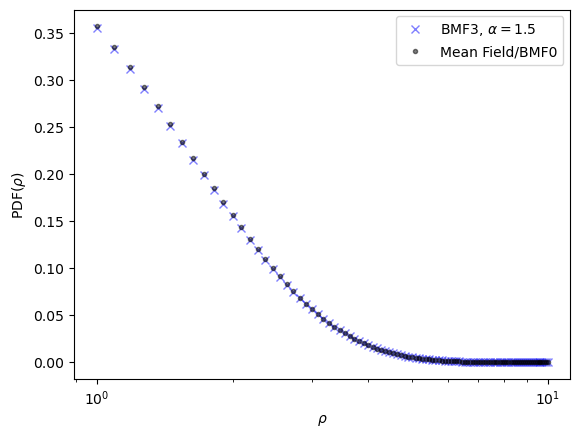

In [39]:
# specify local variance and other Levy parameters
xi_0=1; alpha=3/2; dim=2; bmf=3
pdf_2dnumerical=PDF_rho_InvLaplaceMP(cgf=lambda p: cgf_bmf(p, alpha=alpha, dim=dim, bmf=bmf), \
                                     rhos=rhos, xi_0=xi_0) 
pdf_mean_field=PDF_rho_mf(rhos, xi_0) # mean field reference

fig, ax=plt.subplots()
ax.errorbar(rhos, pdf_2dnumerical, fmt='bx', alpha=0.5, \
            label=rf'BMF{bmf}, $\alpha={np.round(alpha,2)}$')
ax.errorbar(rhos, pdf_mean_field, fmt='k.', alpha=0.5, label='Mean Field/BMF0')

ax.legend(loc='upper right')
ax.set_xscale('log'); ax.set_xlabel(r'$\rho$'); ax.set_ylabel(r'PDF$(\rho$)')
plt.show()                                                                      

The code can be used to check the corrections at different orders beyond mean field (by playing with the `bmf` input in the function `cgf_bmf`). An example is shown in the following.

Note: The input `bmf` corresponds to the number of terms/Laguerre polynomials included in the expansion of the one-point r-CGF of the density.

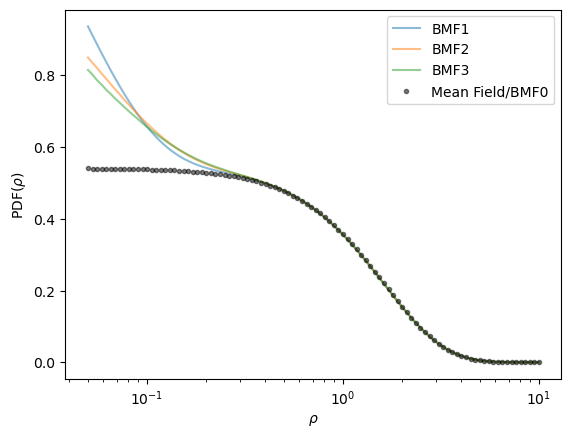

In [41]:
rhos=np.logspace(np.log10(0.05), np.log10(10), 100)
xi_0=1; alpha=3/2; dim=2

# increasing order beyond mean field
fig, ax=plt.subplots()
for bmf in range(1, 3+1):
    pdf_2dnumerical=PDF_rho_InvLaplaceMP(cgf=lambda p: cgf_bmf(p, alpha=alpha, dim=dim, bmf=bmf), \
                                         rhos=rhos, xi_0=xi_0)
    ax.errorbar(rhos, pdf_2dnumerical, alpha=0.5, label=rf'BMF{bmf}')

pdf_mean_field=PDF_rho_mf(rhos, xi_0) # mean field reference
ax.errorbar(rhos, pdf_mean_field, fmt='k.', alpha=0.5, label='Mean Field/BMF0')

ax.legend(loc='upper right')
ax.set_xscale('log')
ax.set_xlabel(r'$\rho$'); ax.set_ylabel(r'PDF$(\rho$)')
plt.show()

The robustness of the parameter choices in the inverse Laplace transform integral can also be tested through `lmd_max`, `dl`, and `h` which corresponds to the upper limit $\lambda_{\rm max}$, the Riemann sum increment $d\lambda$, and the difference $h$ used in approximating the derivative of the CGF by the central difference method.

The results for different choices are shown below.

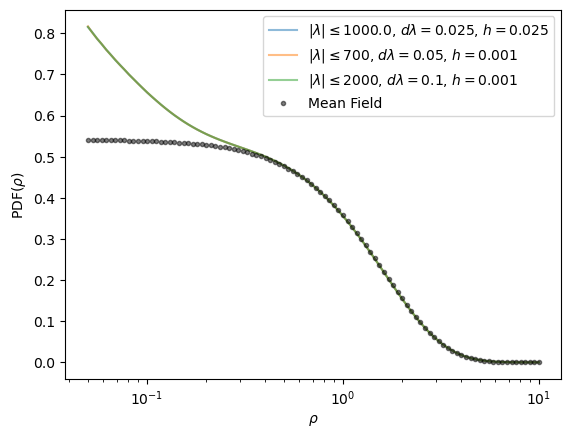

In [43]:
xi_0=1; alpha=3/2; dim=2; bmf=3

# increasing order beyond mean field
fig, ax=plt.subplots()
lmd_max=1e3; dl=0.025; h=0.025 
pdf_3dnumerical=PDF_rho_InvLaplaceMP(cgf=lambda p: cgf_bmf(p, alpha=alpha, dim=dim, bmf=bmf), \
                                     rhos=rhos, xi_0=xi_0, lmd_max=lmd_max, dl=dl, h=h)
ax.errorbar(rhos, pdf_3dnumerical, alpha=0.5, \
            label=rf'$| \lambda | \leq {lmd_max}$, $d\lambda = {dl}$, $h={h}$')

lmd_max=700; dl=0.05; h=1e-3
pdf_3dnumerical=PDF_rho_InvLaplaceMP(cgf=lambda p: cgf_bmf(p, alpha=alpha, dim=dim, bmf=bmf), \
                                     rhos=rhos, xi_0=xi_0, lmd_max=lmd_max, dl=dl, h=h)
ax.errorbar(rhos, pdf_3dnumerical, alpha=0.5, \
            label=rf'$| \lambda | \leq {lmd_max}$, $d\lambda = {dl}$, $h={h}$')

lmd_max=2000; dl=0.1; h=1e-3
pdf_3dnumerical=PDF_rho_InvLaplaceMP(cgf=lambda p: cgf_bmf(p, alpha=alpha, dim=dim, bmf=bmf), \
                                     rhos=rhos, xi_0=xi_0, lmd_max=lmd_max, dl=dl, h=h)
ax.errorbar(rhos, pdf_3dnumerical, alpha=0.5, \
            label=rf'$| \lambda | \leq {lmd_max}$, $d\lambda = {dl}$, $h={h}$')

pdf_mean_field=PDF_rho_mf(rhos, xi_0) # mean field reference
ax.errorbar(rhos, pdf_mean_field, fmt='k.', alpha=0.5, label='Mean Field')

ax.legend(loc='upper right')
ax.set_xscale('log')
ax.set_xlabel(r'$\rho$'); ax.set_ylabel(r'PDF$(\rho$)')
plt.show()

Clearly the numerical integration is robust to choices of parameters in the integral.

Lastly an example is shown that uses the code to compare the high density tail/behavior of mean field and beyond mean field expectation values.

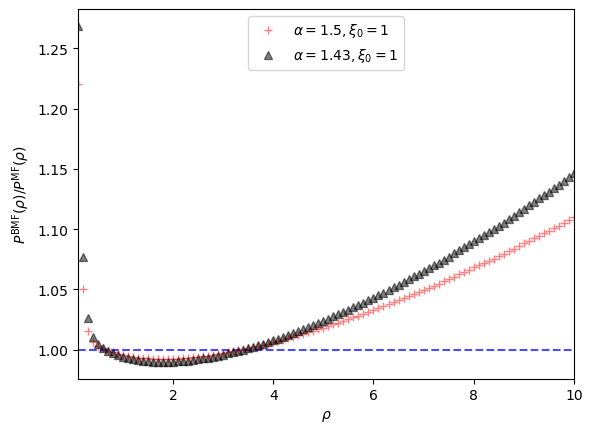

In [49]:
# create array of rho values; pdf will be evaluated at these points
rho_min=0.1; rho_max=10; nrho=100
rhos=np.linspace(rho_min, rho_max, nrho) # array of rho values


# specify local variance
xi_0=1
pdf_mean_field=PDF_rho_mf(rhos, xi_0) # mean field reference

fig, ax=plt.subplots()

alpha=3/2
pdf_2dnumerical=PDF_rho_InvLaplaceMP(cgf=lambda p: cgf_bmf(p, alpha=alpha, dim=2, bmf=3), \
                                     rhos=rhos, xi_0=xi_0) 
ax.errorbar(rhos, pdf_2dnumerical/pdf_mean_field, fmt='r+', alpha=0.5, \
            label=rf'$\alpha={np.round(alpha,2)}, \xi_0={np.round(xi_0,1)}$')

alpha=1.43
pdf_2dnumerical=PDF_rho_InvLaplaceMP(cgf=lambda p: cgf_bmf(p, alpha=alpha, dim=2, bmf=3), \
                                     rhos=rhos, xi_0=xi_0) 
ax.errorbar(rhos, pdf_2dnumerical/pdf_mean_field, fmt='k^', alpha=0.5, \
            label=rf'$\alpha={np.round(alpha,2)}, \xi_0={np.round(xi_0,1)}$')

ax.axhline(y=1, linestyle='--', color='blue', alpha=0.7)

ax.legend(loc='upper center')
ax.set_xlim(min(rhos), max(rhos))
ax.set_xlabel(r'$\rho$'); ax.set_ylabel(r'$P^{\rm BMF}(\rho)/P^{\rm MF}(\rho)$')
plt.show()                                                                      

End of notebook